# Test of the Ben Sira package

In [1]:
from pkg.Extraction import VariantsFinder
from pkg.Latex import generate_latex

[nltk_data] Downloading package punkt to /home/mari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
fileNames = ["ms_a_new.xml","ms_b_new.xml","ms_d_new.xml","ms_e_new.xml","ms_f_new.xml"]

In [3]:
vf = VariantsFinder(fileNames, folder = "WorkDir/")

# Matching Done
## Cleaning Done
### Collation Done
#### Distance Done


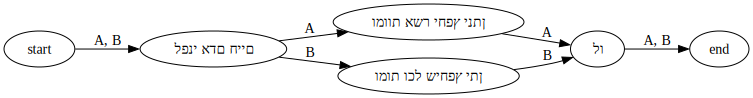

In [4]:
vf.getSampleVariant()

In [5]:
test = vf.witnesses[1]
print(test)

Verse 22 : aligned
+---+---+----+-----+-----------------+-----------+
| A |   | גר | וזר | נכרי ורש תפארתם | יאת אלהים |
| B | - | גר | זר  | נכרי ורש תפארתם | יראת ייי  |
+---+---+----+-----+-----------------+-----------+


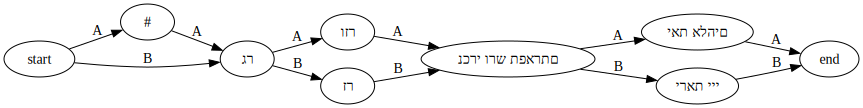

In [6]:
test.getSVG()

In [7]:
test.getHTML()

A,,גר,וזר,נכרי ורש תפארתם,יאת אלהים
B,-,גר,זר,נכרי ורש תפארתם,יראת ייי


In [8]:
print(test.getCSV())

A, ,גר ,וזר ,נכרי ורש תפארתם ,יאת אלהים
B,,גר ,זר ,נכרי ורש תפארתם ,יראת ייי 



In [9]:
df = vf.getDF()
df

,Verse A,Verse B,Manuscript A,Manuscript B,Chapter A,Chapter B,Verse,Levenshtein,Hamming
0,אַל תתחכם לעבד חפצך ואל תתכעת צרכך,אל תתחכם לעשות חפצך ואל תתכב,ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,26,8,11
1,גר וזר נכרי ורש תפארתם יאת אלהים,גר זר נכרי ורש תפארתם יראת ייי,ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,22,6,9
2,מרשיע נפשו מי יצדיקנו ומי יכבד מקלה נפשו,בני מרשיע נפשו מי יצדיקנו ומי יכבד מ,ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,29,7,8
3,נכבד בעשרו איככה ונקלה בעיניו איככה,הנכבד בעיניו בעשרו איככה ונקלה בעשרו בעיניו איככה,ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,31,12,16
4,בני בענוה כבד נפשך ויתן לך טם כיוצא בﬣ,בני בענוה כבד נפשך ותן לה טעם כיוצ,ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,28,6,9
5,בין אחים ראשם נכבד וירא אלהים בעינ,בין אחים ראשם נכבד וירא אלהים נכבד ממנו,ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,20,6,8
6,יש דל נכבד בגלל שכלו ויש נכבד בגלל עשרו,דל נכבד בגלל שכלו ויש איש עשיר נכבד בגלל,ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,30,3,7
7,עבד משכיל הורם ועבד ש לﬡ יתאונן,עבד משכיל חביב כנפש,ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,25,15,17
8,טוב עובד ויותר הון ממתכבד חס מתן,טוב עובד ויותר הון ממתכבד,ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,27,5,5
9,ש מושל ושופט נכבדו ואן גדול מרא אלהים,שר שופט ומושל נכבדו וא גד,ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,24,17,22


In [10]:
vf.getCSV()
vf.getMarkdown()

AttributeError: 'VariantsFinder' object has no attribute 'filename'